In [9]:
import numpy as np
import pandas as pd

%matplotlib inline

np.random.seed(seed=1960)

# generate a daily signal covering one year 2016 in a pandas dataframe
N = 360
df_train = pd.DataFrame({"Date" : pd.date_range(start="2016-01-25", periods=N, freq='D'),
                         "Signal" : (np.arange(N)//40 + np.arange(N) % 21 + np.random.randn(N))})


In [10]:
df_train.head(12)

,Date,Signal
0,2016-01-25,1.904897
1,2016-01-26,-0.429674
2,2016-01-27,0.685613
3,2016-01-28,3.025123
4,2016-01-29,4.401209
5,2016-01-30,6.495635
6,2016-01-31,7.040249
7,2016-02-01,8.398452
8,2016-02-02,7.632028
9,2016-02-03,9.793939


In [11]:
df_train.tail(12)

,Date,Signal
348,2017-01-07,20.726778
349,2017-01-08,20.457208
350,2017-01-09,21.185194
351,2017-01-10,23.803768
352,2017-01-11,24.368608
353,2017-01-12,25.493171
354,2017-01-13,24.279326
355,2017-01-14,25.904933
356,2017-01-15,28.600812
357,2017-01-16,7.913264


<AxesSubplot: xlabel='Date'>

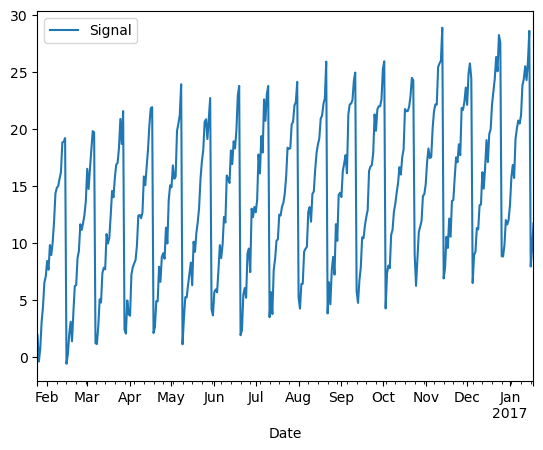

In [12]:
df_train.plot('Date' , ['Signal'])

In [13]:

import pyaf.ForecastEngine as autof
# create a forecast engine. This is the main object handling all the operations
lEngine = autof.cForecastEngine()

# get the best time series model for predicting one week
lEngine.train(iInputDS = df_train, iTime = 'Date', iSignal = 'Signal', iHorizon = 7);
lEngine.getModelInfo() # => relative error 7% (MAPE)


INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signals': ['Signal'], 'Horizons': {'Signal': 7}}))
INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['Signal'], 'Transformations': [('Signal', 'None', '_', 'T+S+R'), ('Signal', 'None', 'Diff_', 'T+S+R'), ('Signal', 'None', 'RelDiff_', 'T+S+R'), ('Signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal', 'Horizon': 7, 'Transformation': '_Signal', 'DecompositionType': 'T+S+R'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal', 'Horizon': 7, 'Transformation': 'Diff_Signal', 'DecompositionType': 'T+S+R'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal', 'Horizon': 7, 'Transformation': 'RelDiff_Signal', 'DecompositionType': 'T+S+R'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal', 'Horizon': 7, 'Transformation': 'CumSum_Signal', 'DecompositionType': 'T+S+R'}))
INFO:pyaf.timing:('OPERATIO

INFO:pyaf.timing:('OPERATION_START', ('PLOTTING', {'Signals': ['Signal']}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 1.472, ('PLOTTING', {'Signals': ['Signal']}))


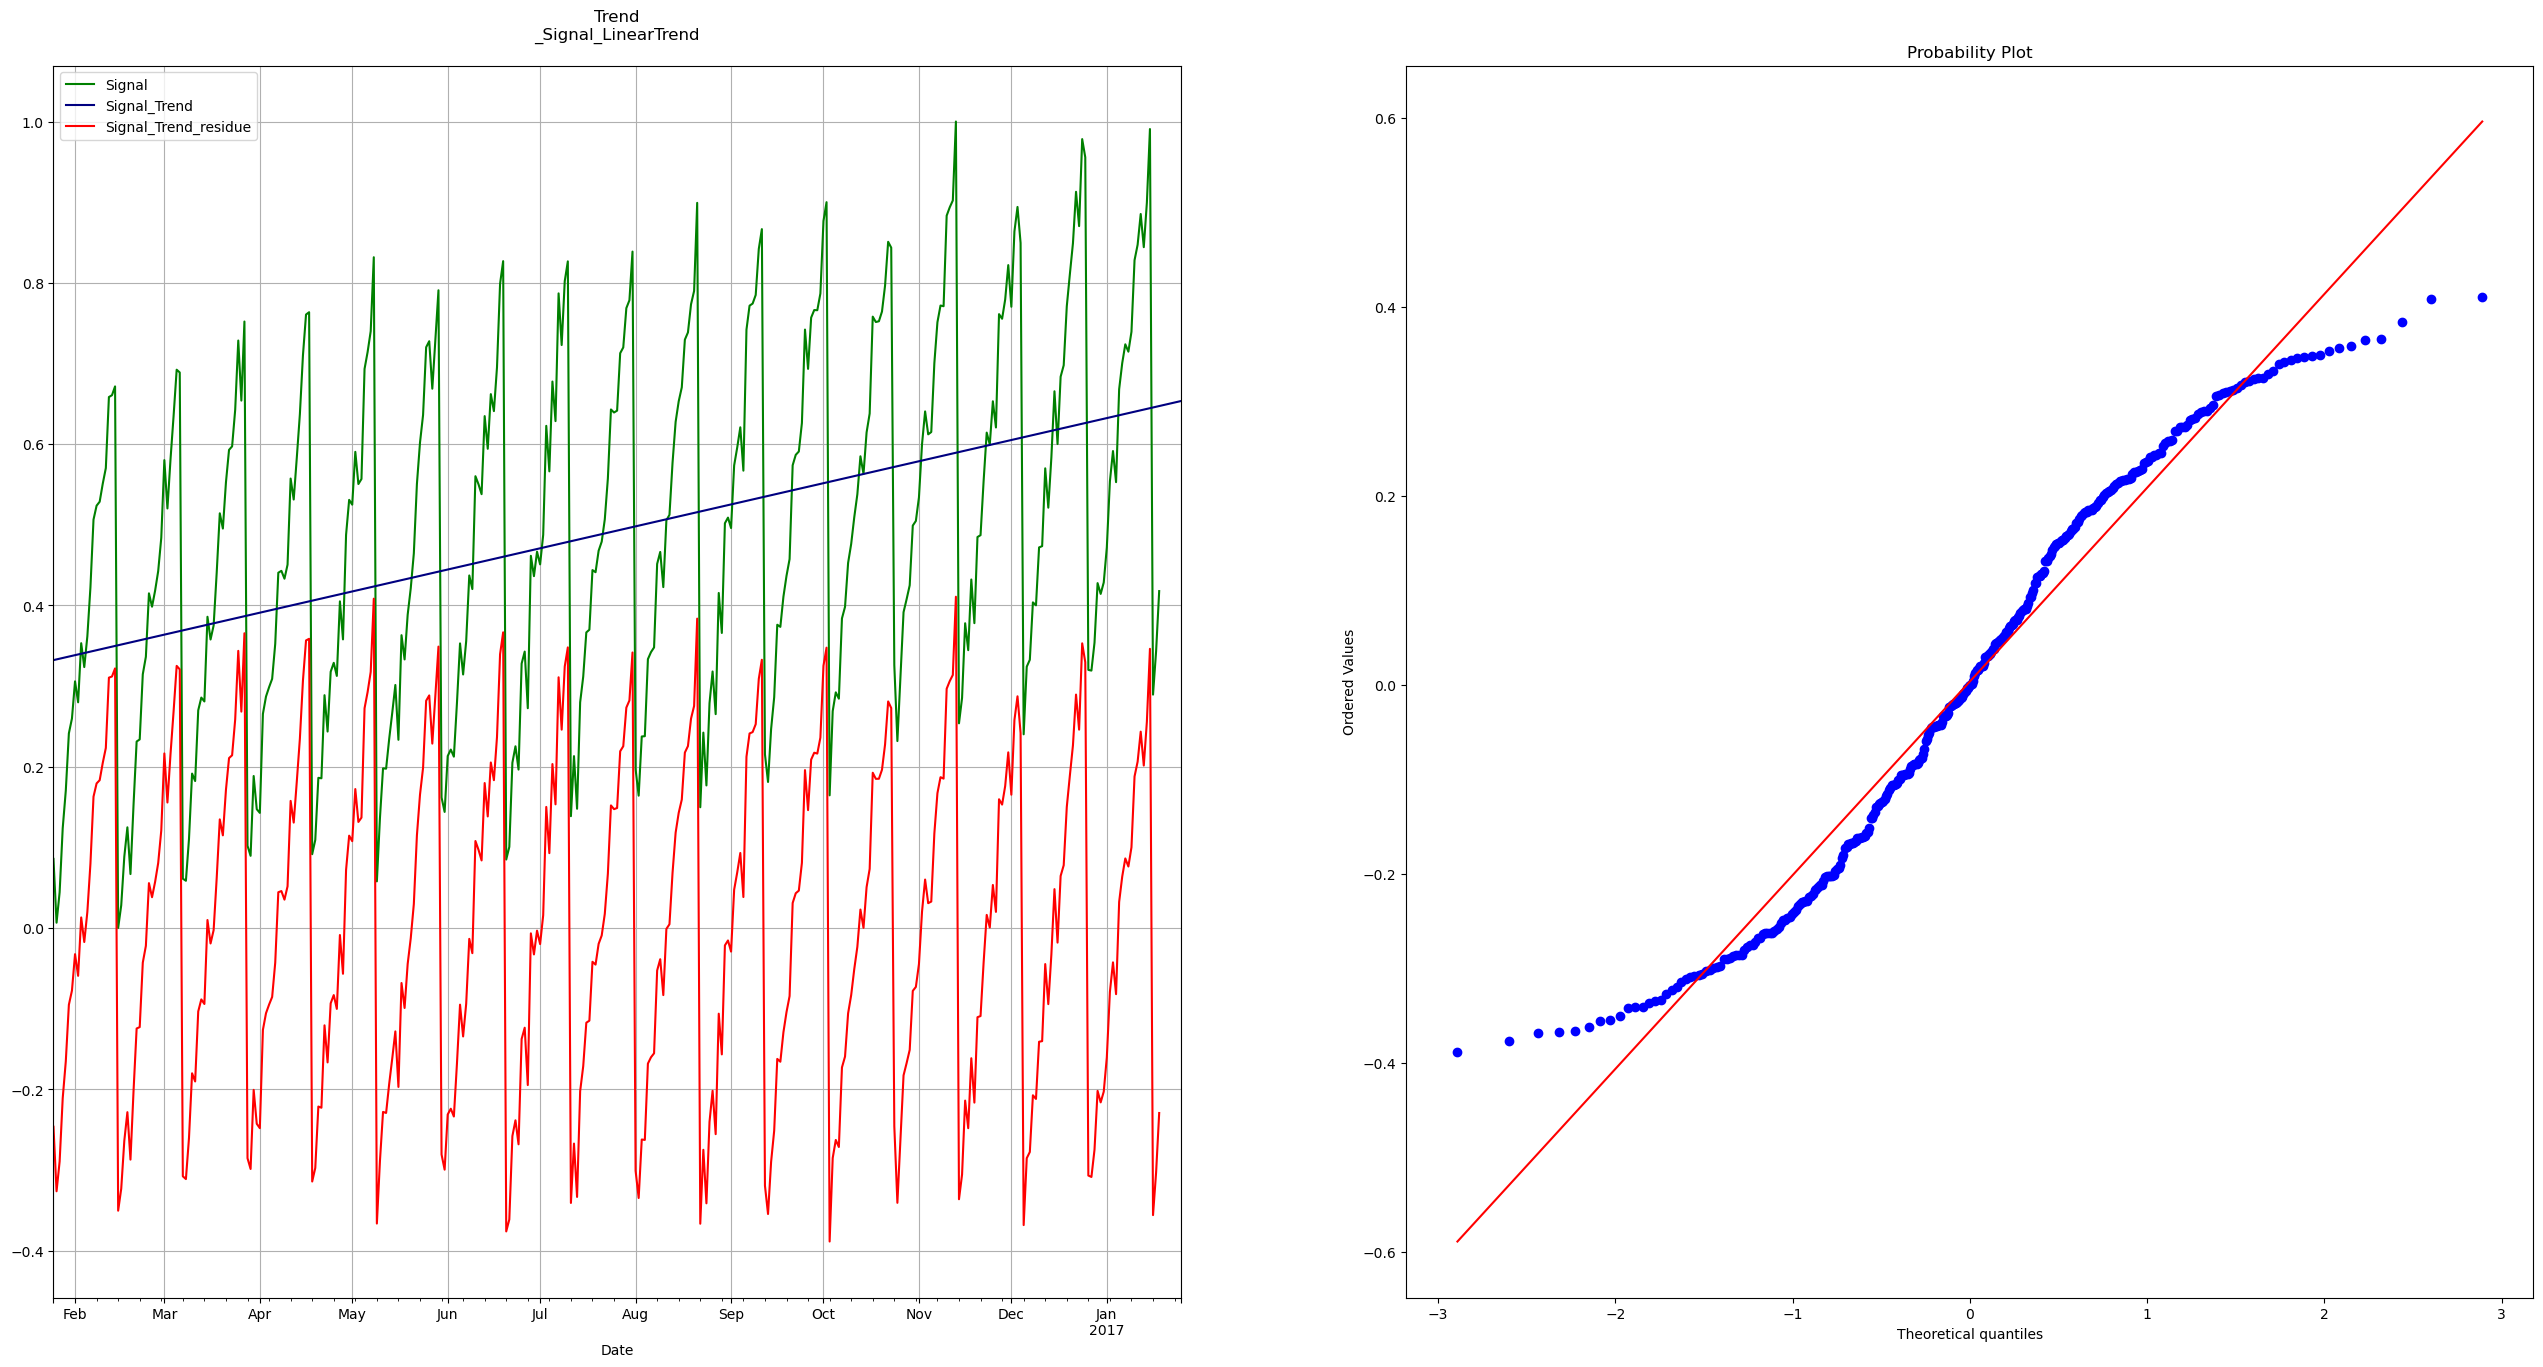

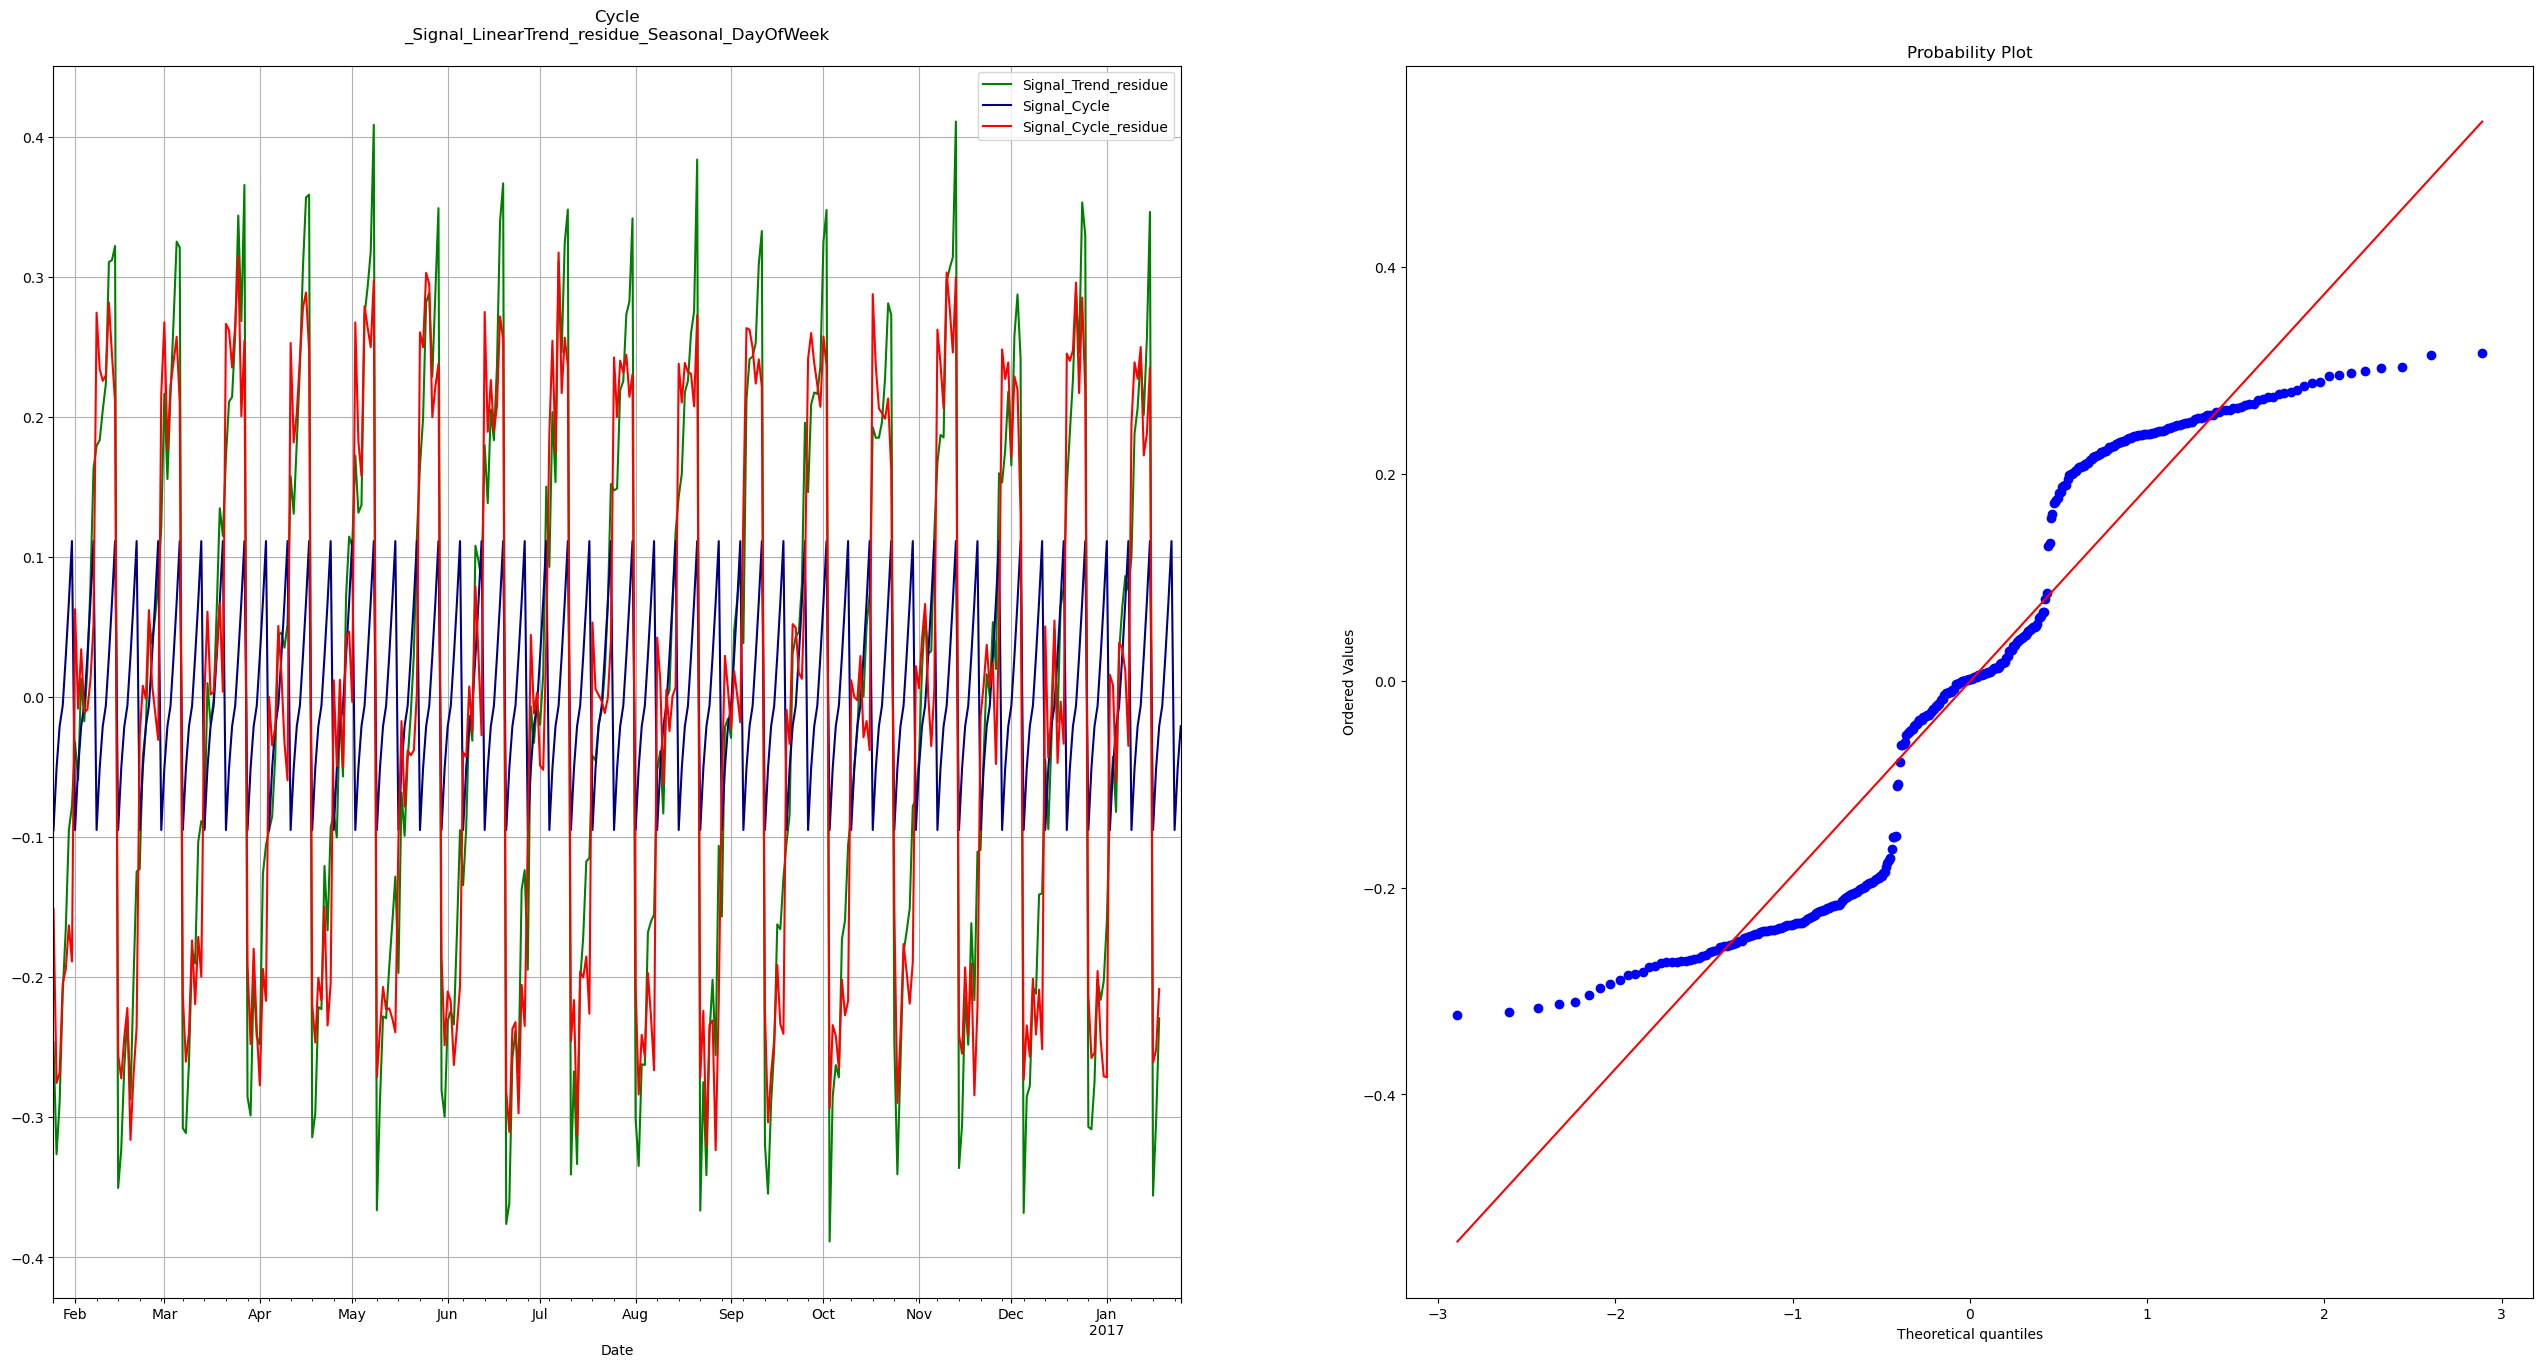

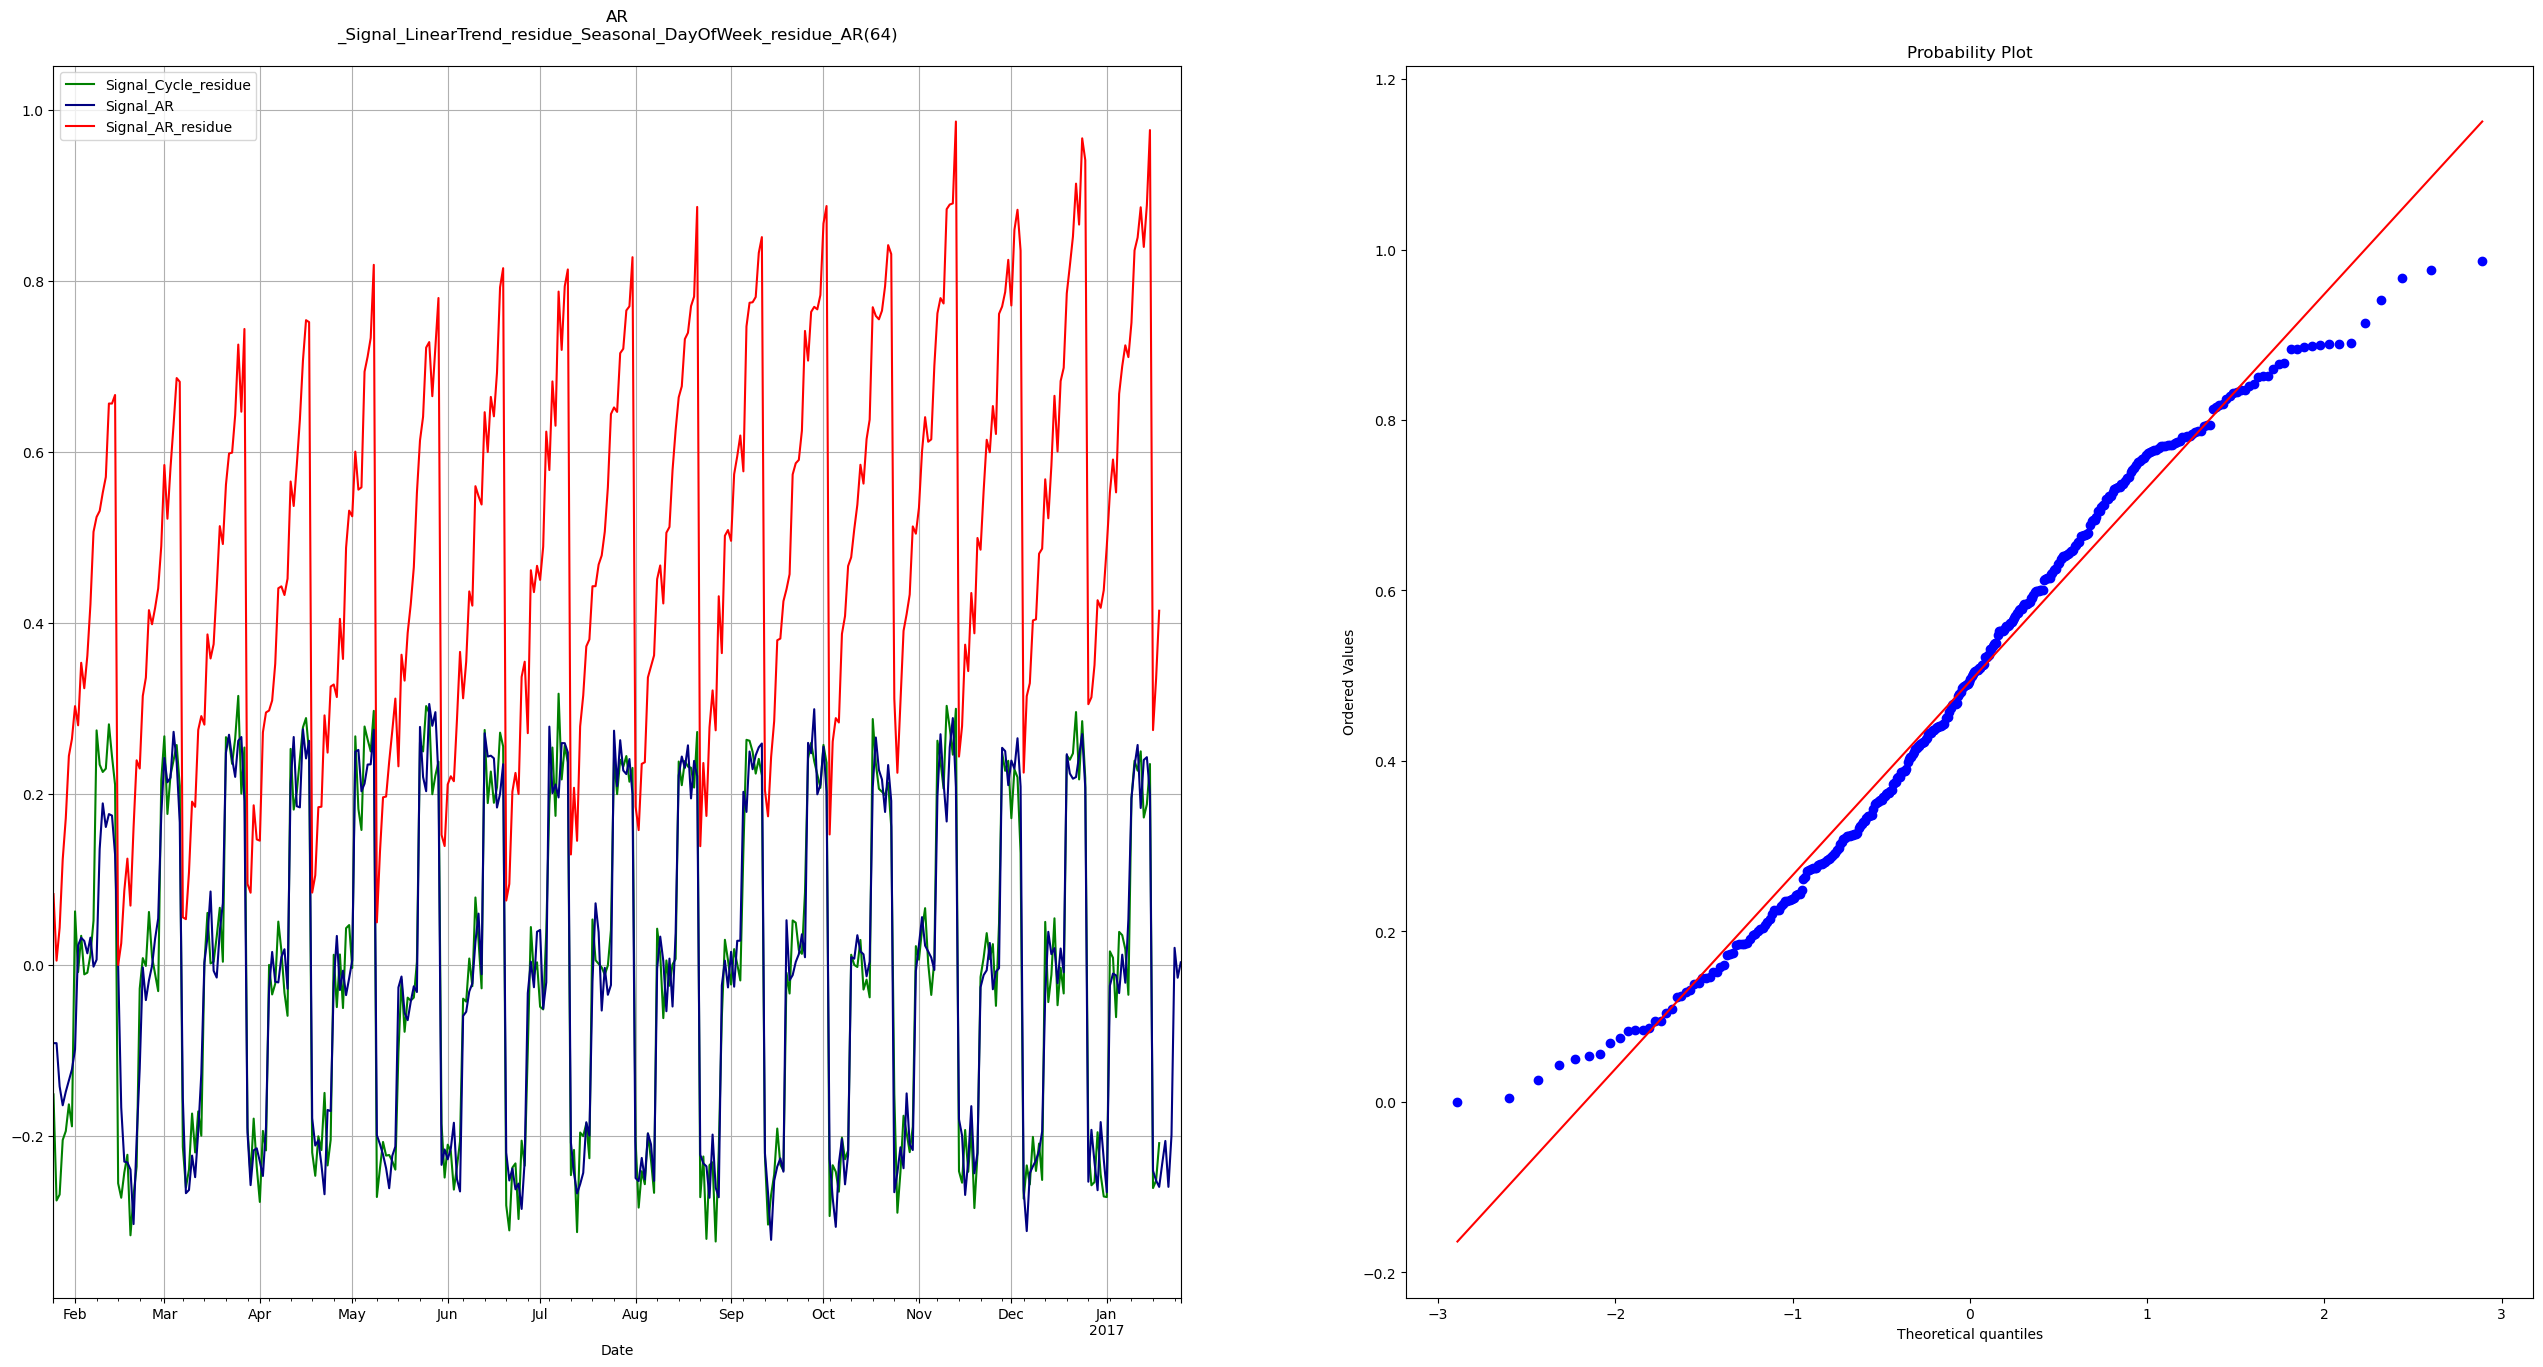

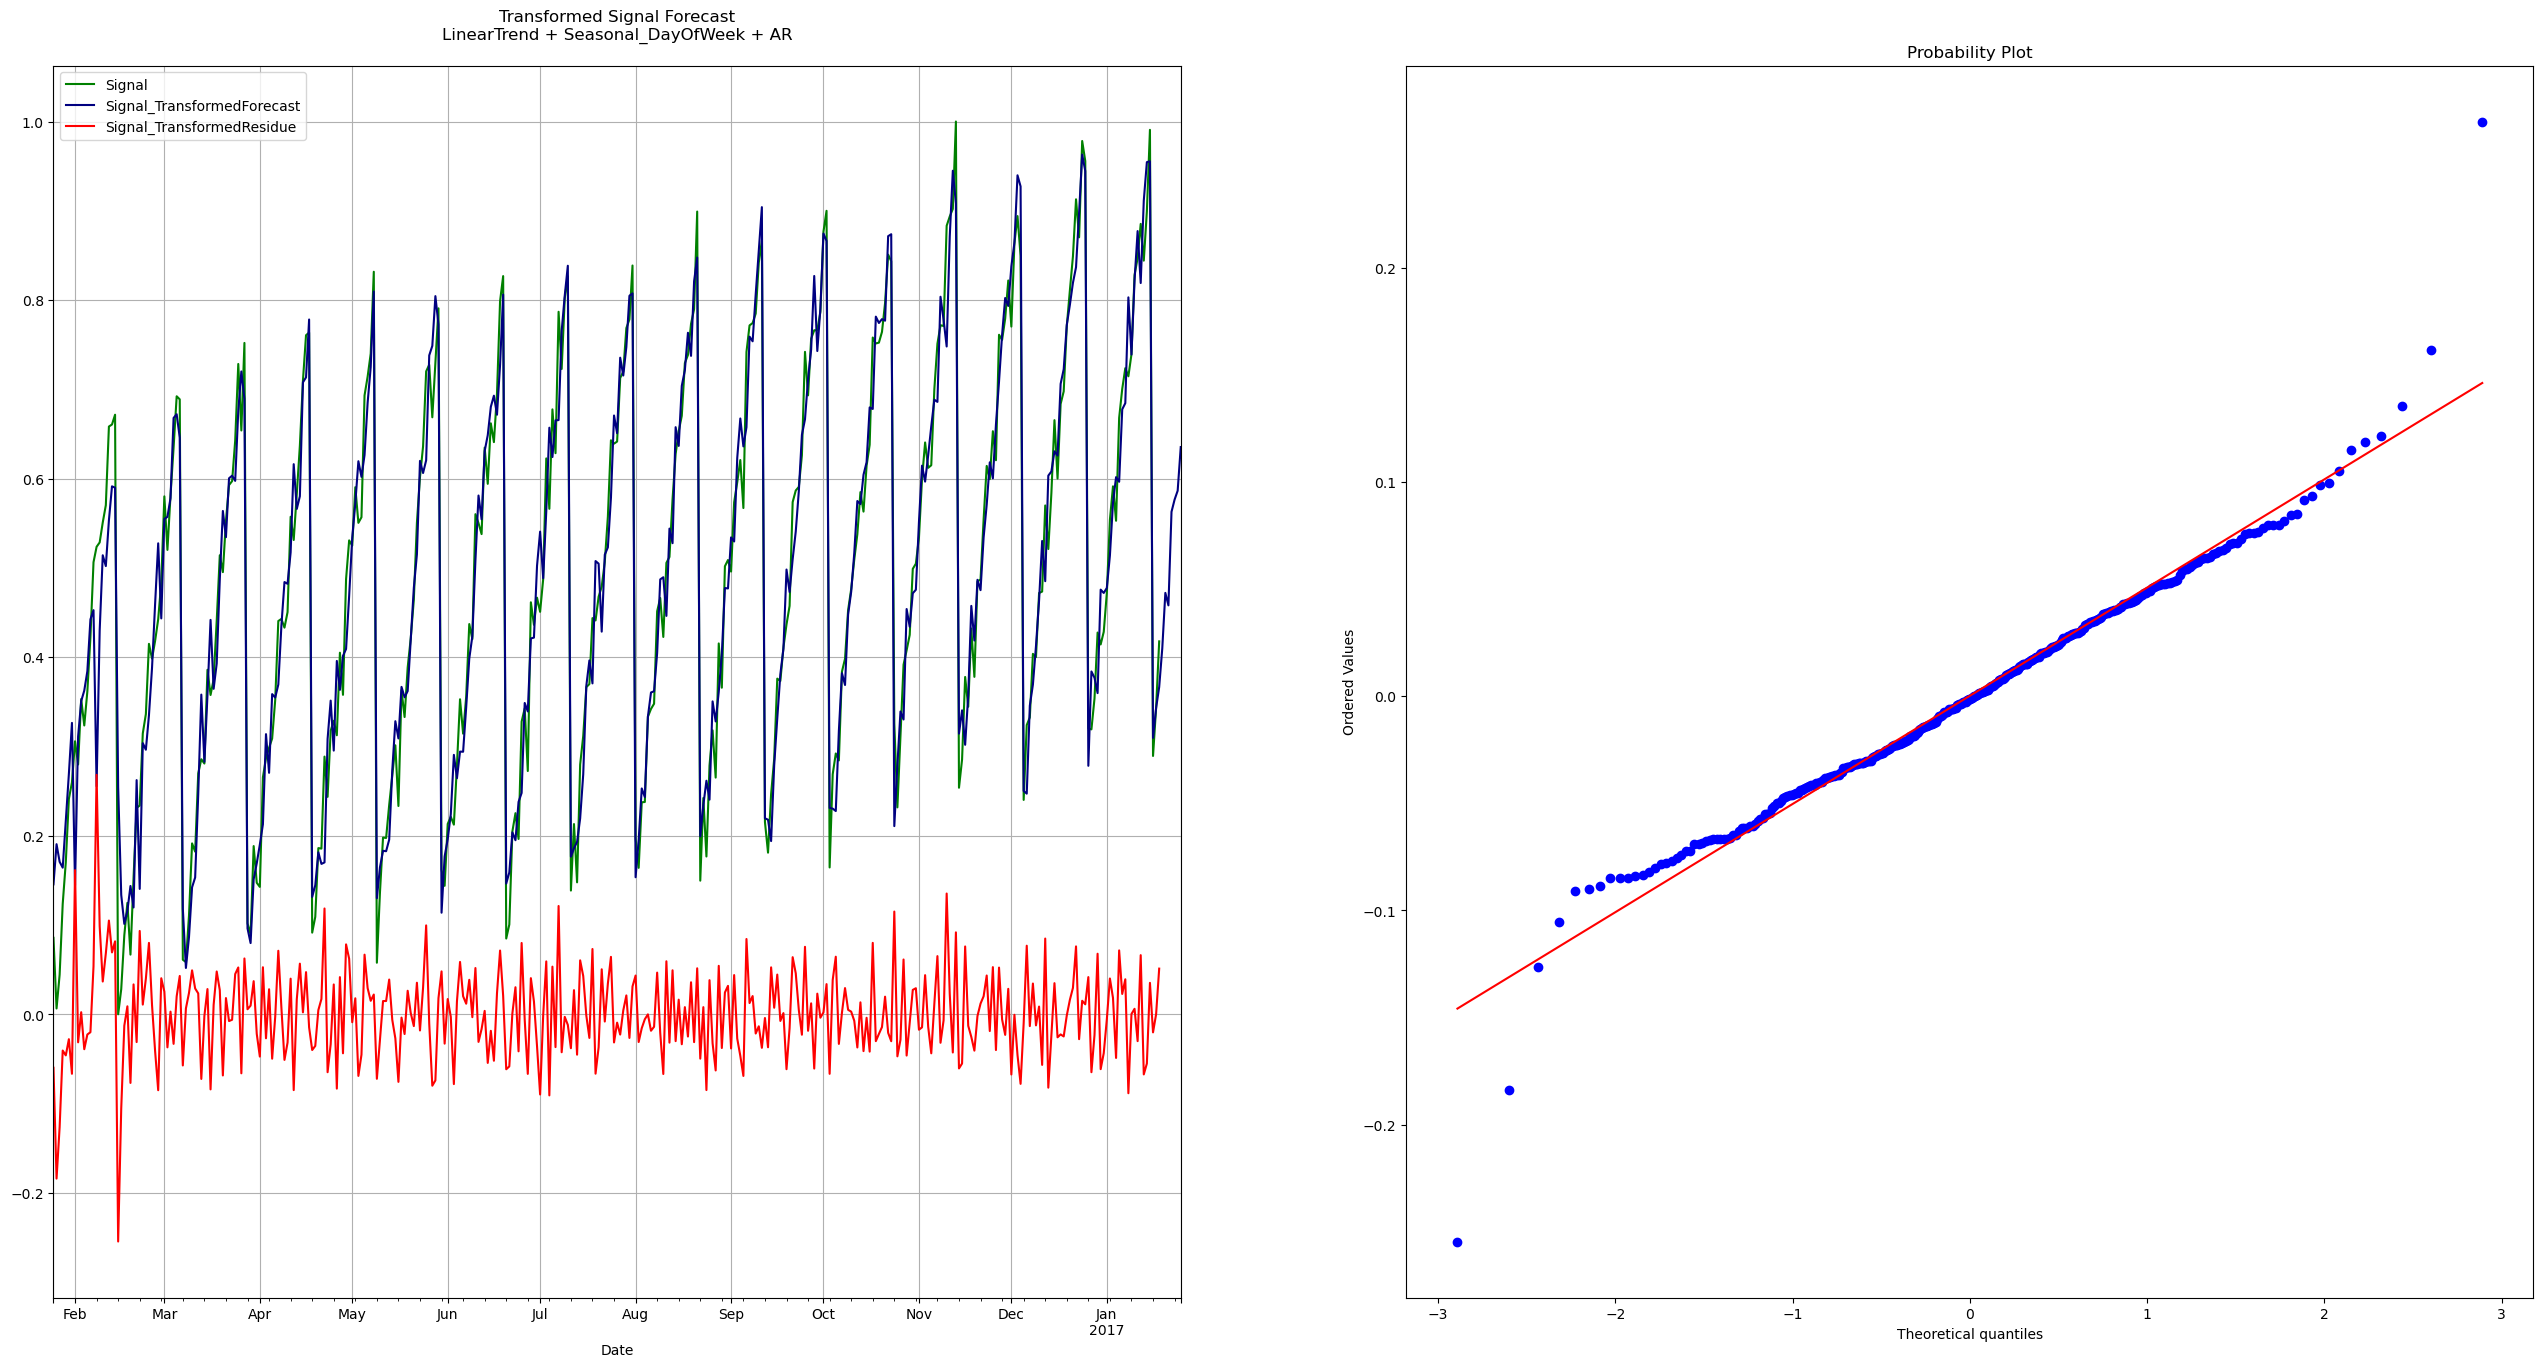

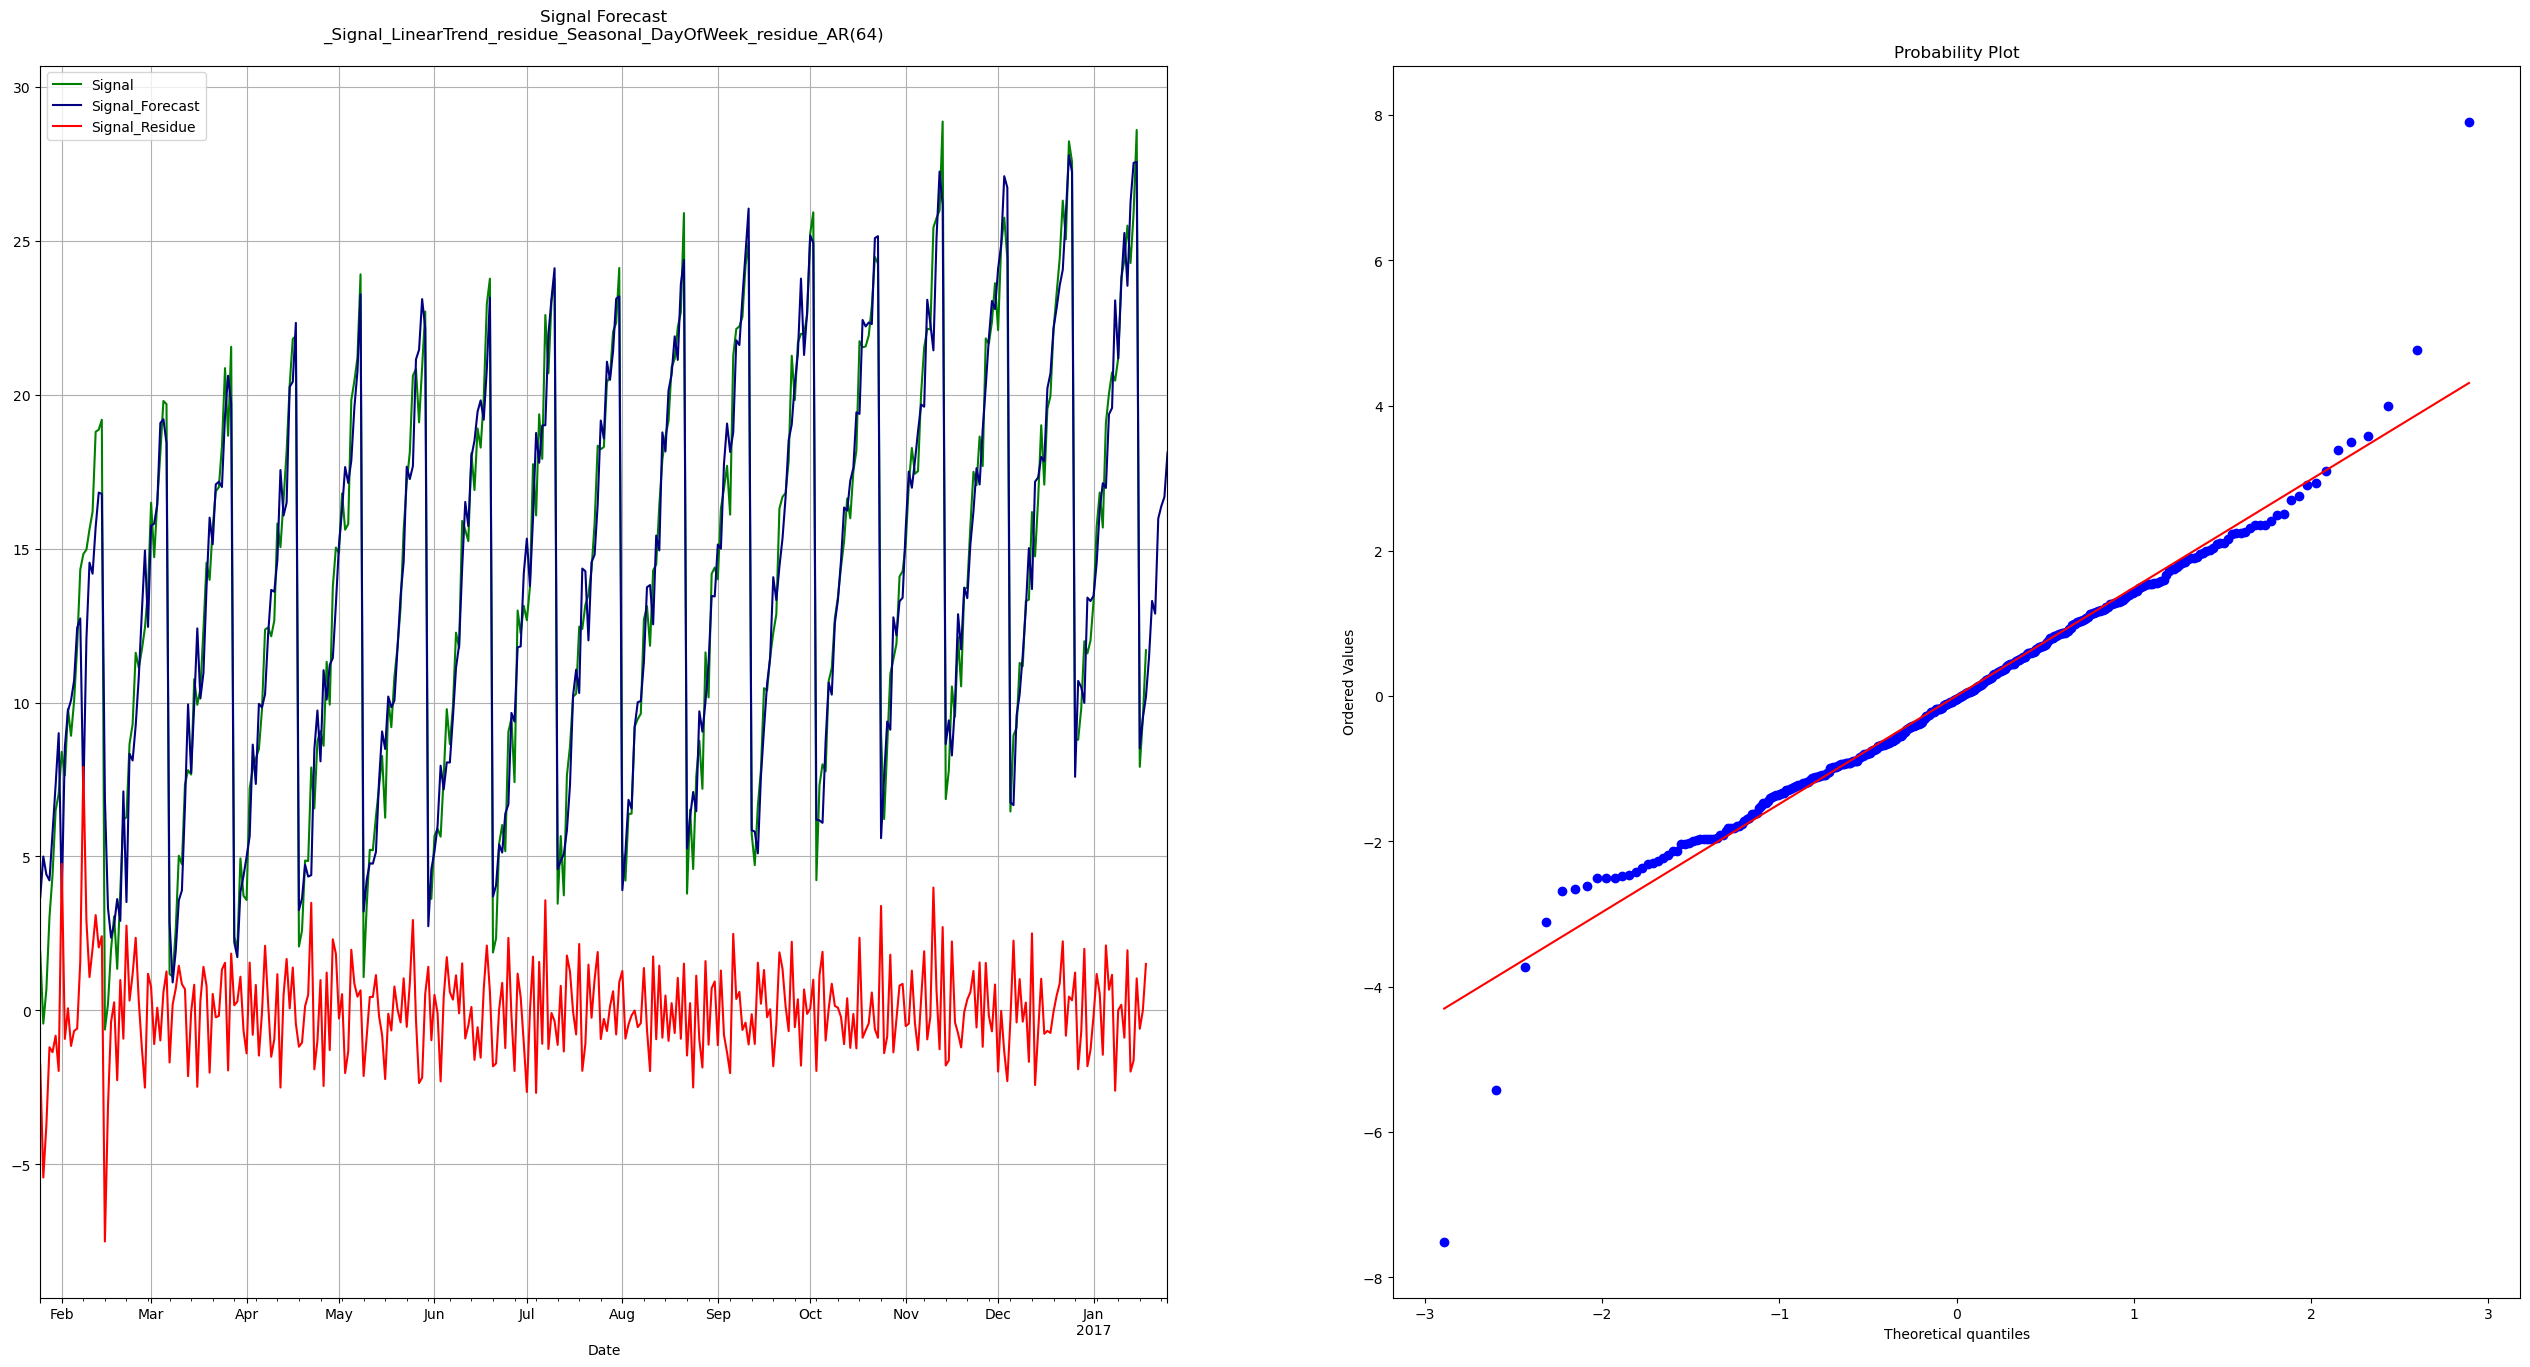

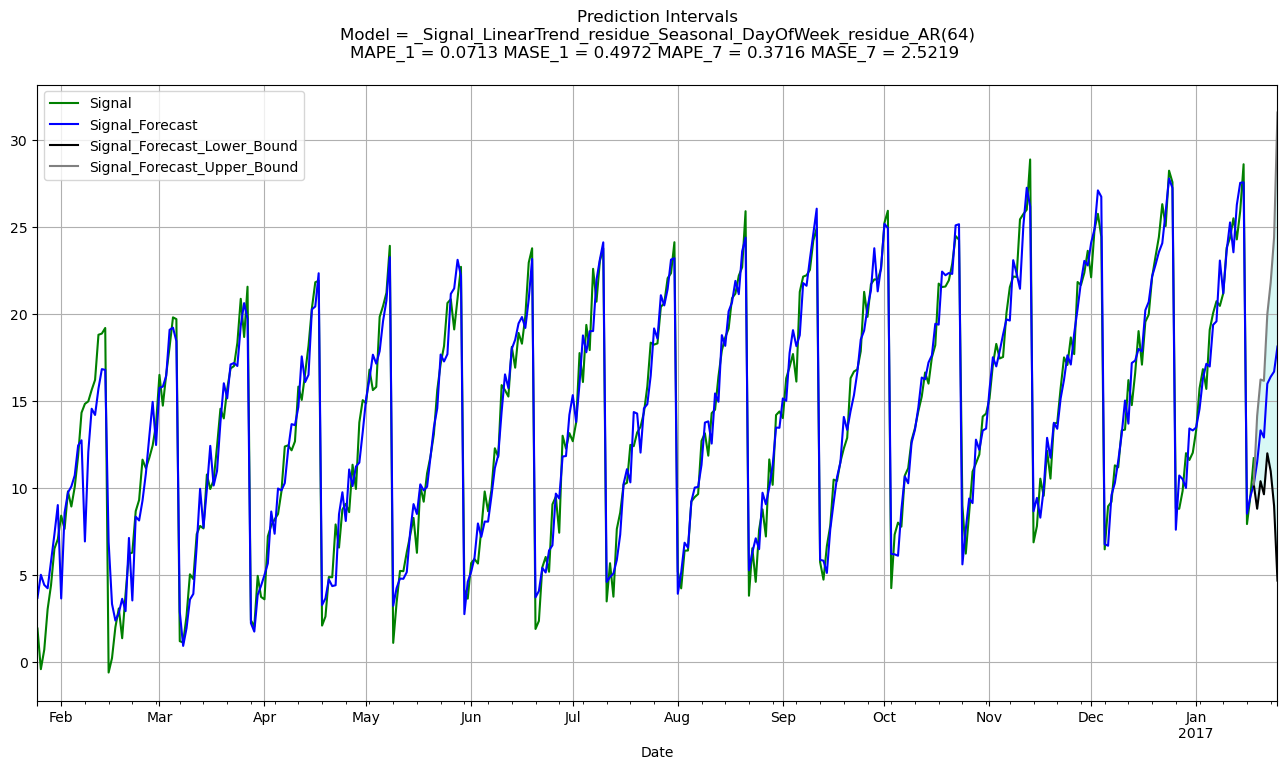

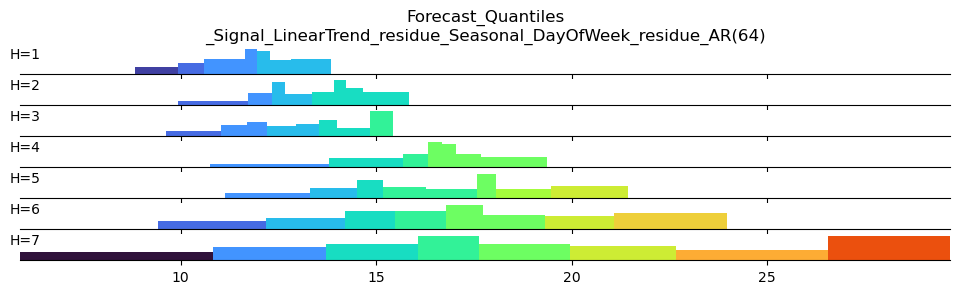

In [14]:
lEngine.standardPlots()

In [15]:

# predict one week
df_forecast = lEngine.forecast(iInputDS = df_train, iHorizon = 7)
# list the columns of the forecast dataset
print(df_forecast.columns) #

# print the real forecasts
# Future dates : ['2017-01-19T00:00:00.000000000' '2017-01-20T00:00:00.000000000' '2017-01-21T00:00:00.000000000' '2017-01-22T00:00:00.000000000' '2017-01-23T00:00:00.000000000' '2017-01-24T00:00:00.000000000' '2017-01-25T00:00:00.000000000']
print(df_forecast['Date'].tail(7).values)

# signal forecast : [ 9.74934646  10.04419761  12.15136455  12.20369717  14.09607727 15.68086323  16.22296559]
print(df_forecast['Signal_Forecast'].tail(7).values)

INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Signal'], 'Horizon': 7}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.12, ('FORECASTING', {'Signals': ['Signal'], 'Horizon': 7}))


Index(['Date', 'Signal', 'row_number', 'Date_Normalized', 'scaled_Signal',
       '_Signal', '_Signal_LinearTrend', '_Signal_LinearTrend_residue',
       '_Signal_LinearTrend_residue_Seasonal_DayOfWeek',
       '_Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue',
       '_Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)',
       '_Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)_residue',
       'Signal_Transformed', '_Signal_Trend', '_Signal_Trend_residue',
       '_Signal_Cycle', '_Signal_Cycle_residue', '_Signal_AR',
       '_Signal_AR_residue', '_Signal_TransformedForecast', 'Signal_Forecast',
       '_Signal_TransformedResidue', 'Signal_Residue',
       'Signal_Forecast_Lower_Bound', 'Signal_Forecast_Upper_Bound',
       'Signal_Forecast_Quantile_2', 'Signal_Forecast_Quantile_14',
       'Signal_Forecast_Quantile_26', 'Signal_Forecast_Quantile_38',
       'Signal_Forecast_Quantile_50', 'Signal_Forecast_Quantile_62',
       'Signal_Forecast_Quantile_74'

In [8]:
print(lEngine.to_json())

{
    "Signal": {
        "Complexity": {
            "AR": "S",
            "Cycle": "S",
            "Decomposition": "S",
            "Transformation": "S",
            "Trend": "S"
        },
        "Dataset": {
            "Signal": "Signal",
            "Time": {
                "Horizon": 7,
                "TimeDelta": "<DateOffset: days=1>",
                "TimeMax": "2017-01-18 00:00:00",
                "TimeMin": "2016-01-25 00:00:00",
                "TimeVariable": "Date"
            },
            "Training_Signal_Length": 360
        },
        "Model": {
            "AR_Model": "NoAR",
            "Best_Decomposition": "_Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue_NoAR",
            "Cycle": "Seasonal_DayOfWeek",
            "Signal_Decomposition_Type": "T+S+R",
            "Signal_Transoformation": "NoTransf",
            "Trend": "LinearTrend"
        },
        "Model_Performance": {
            "1": {
                "AUC": 0.531,
                "DiffS